# **Estudiantes:**
- Felipe García
- Fabian Tovar



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
import sys
import os

# Obtener la ruta absoluta a la carpeta 'function'
# Sube un nivel desde 'notebooks' y luego entra a 'function'
function_path = os.path.abspath(os.path.join('..', 'function'))

# Añadir la ruta al sys.path si no está ya ahí
# Esto evita añadir la ruta múltiples veces si ejecutas la celda de nuevo
if function_path not in sys.path:
    sys.path.append(function_path)

# Ahora puedes importar tus módulos
from Methodologies_Port import *
from metrics_portfolio import *
from Portafolio_DeFi import *
from yahoo_data import *


*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos tipo log creados ***
*** retornos t

# 1. Incorporación del activo libre de riesgo


### 1.1. Descarga y preprocesamiento
- Descargue precios ajustados diarios de los activos de riesgo y de la serie **^IRX** (T-Bill a 13 semanas) usando `yfinance`.
- Alinee calendarios de negociación y elimine faltantes en el rango de fechas definido.

In [3]:

tickers   = ["AAPL", "CX", "TSLA", "BTC-USD", "MCD"]
rf_ticker = ["^IRX"]

start_est = "2025-01-01"
end_est   = "2025-07-01"

# Descargar y alinear (usa Adj Close por defecto)
data_all = yahoo_data.preprocess_data(tickers, rf_ticker, start_est, end_est)

# Separar activos de riesgo y rf
prices_assets = data_all[tickers]
prices_rf     = data_all[rf_ticker]


In [4]:
prices_assets

Ticker,AAPL,CX,TSLA,BTC-USD,MCD
Date,,,,,
2025-01-02,242.987411,5.652203,379.279999,96886.875000,289.190643
2025-01-03,242.499146,5.622402,410.440002,98107.429688,291.434875
2025-01-06,244.133347,5.691937,411.049988,102078.085938,288.864380
2025-01-07,241.353210,5.672070,394.359985,96922.703125,286.056610
2025-01-08,241.841476,5.652203,394.940002,95043.523438,283.644287
...,...,...,...,...,...
2025-06-24,200.072937,6.940000,340.470001,106045.632812,291.470001
2025-06-25,201.331512,6.740000,327.549988,107361.257812,285.549988
2025-06-26,200.772141,6.830000,325.779999,106960.000000,285.630005


In [5]:
data_all = (
    pd.concat([prices_assets, prices_rf], axis=1, join="inner")
      .sort_index()
      .dropna(how="any")
)


In [6]:
data_all

Ticker,AAPL,CX,TSLA,BTC-USD,MCD,^IRX
Date,,,,,,
2025-01-02,242.987411,5.652203,379.279999,96886.875000,289.190643,4.208
2025-01-03,242.499146,5.622402,410.440002,98107.429688,291.434875,4.193
2025-01-06,244.133347,5.691937,411.049988,102078.085938,288.864380,4.190
2025-01-07,241.353210,5.672070,394.359985,96922.703125,286.056610,4.203
2025-01-08,241.841476,5.652203,394.940002,95043.523438,283.644287,4.205
...,...,...,...,...,...,...
2025-06-24,200.072937,6.940000,340.470001,106045.632812,291.470001,4.182
2025-06-25,201.331512,6.740000,327.549988,107361.257812,285.549988,4.188
2025-06-26,200.772141,6.830000,325.779999,106960.000000,285.630005,4.193


### 1.2. Conversión de la tasa libre de riesgo
- Interprete **^IRX** como una tasa anualizada.
- Conviértala a tasa diaria efectiva mediante la fórmula:

$$
r_{day} = (1 + r_{ann})^{1/252} - 1
$$
- Genere series de tasa libre de riesgo diaria y anual.

In [7]:
rf_ann, rf_daily = yahoo_data.convert_rf(data_all[['^IRX']] )

#### Anual

In [8]:
rf_ann

,^IRX_ann
Date,
2025-01-02,0.04208
2025-01-03,0.04193
2025-01-06,0.04190
2025-01-07,0.04203
2025-01-08,0.04205
...,...
2025-06-24,0.04182
2025-06-25,0.04188
2025-06-26,0.04193


#### Diario

In [9]:
rf_daily

,^IRX_daily
Date,
2025-01-02,0.000164
2025-01-03,0.000163
2025-01-06,0.000163
2025-01-07,0.000163
2025-01-08,0.000163
...,...
2025-06-24,0.000163
2025-06-25,0.000163
2025-06-26,0.000163


### 1.3. Exceso de retorno y exposición
- Devuelva:
  1. Retornos diarios de los activos de riesgo.
  2. Serie de tasa libre de riesgo diaria y anual.
  3. Un indicador que permita trabajar con **retornos en exceso** cuando se calcule el Sharpe ratio o el portafolio tangente.

In [10]:
rets_assets = yahoo_data.compute_returns_from_prices(data_all, kind="log")
rets_excess = yahoo_data.excess_returns(rets_assets, rf_daily)

print("Activos (precios):", prices_assets.shape)
print("RF anualizada:", rf_ann.shape)
print("RF diaria:", rf_daily.shape)
print("Retornos activos:", rets_assets.shape)
print("Retornos en exceso:", rets_excess.shape)

Activos (precios): (122, 5)
RF anualizada: (122, 1)
RF diaria: (122, 1)
Retornos activos: (121, 6)
Retornos en exceso: (121, 6)


/media/fabian/INFO/Universidad externado/Defi3/portafolio_de_inversion/function/yahoo_data.py:160: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



# 2. Portafolio media–varianza eficiente

### 2.1 Estadísticos: μ y Σ anualizados

In [11]:
# Retornos diarios 
rets_assets = yahoo_data.compute_returns_from_prices(data_all[["AAPL", "CX", "TSLA", "BTC-USD", "MCD"]], kind="log")

# µ anualizada (vector de medias)
mu = rets_assets.mean() * 252

# Σ anualizada (matriz de covarianzas)
Sigma = rets_assets.cov() * 252

print("Vector de medias anualizadas (µ):")
print(mu)

print("\nMatriz de covarianzas anualizada (Σ):")
print(Sigma)

Vector de medias anualizadas (µ):
Ticker
AAPL      -0.354685
CX         0.424473
TSLA      -0.369238
BTC-USD    0.209407
MCD        0.021347
dtype: float64

Matriz de covarianzas anualizada (Σ):
Ticker       AAPL        CX      TSLA   BTC-USD       MCD
Ticker                                                   
AAPL     0.164515  0.062497  0.183096  0.060213  0.022654
CX       0.062497  0.164931  0.120094  0.058685  0.019255
TSLA     0.183096  0.120094  0.585327  0.174648  0.007702
BTC-USD  0.060213  0.058685  0.174648  0.182179  0.002897
MCD      0.022654  0.019255  0.007702  0.002897  0.044436


### 2.2 Optimización

In [12]:
# Retornos diarios (log)
rets_assets = yahoo_data.compute_returns_from_prices(
    data_all[["AAPL", "CX", "TSLA", "BTC-USD", "MCD"]], kind="log"
)

# µ y Σ anualizados
mu    = rets_assets.mean() * 252
Sigma = rets_assets.cov()  * 252


# Elige un retorno objetivo anual (ejemplos)
mu_target = float(mu.mean())         # la media de medias
# mu_target = float(np.quantile(mu, 0.5))  # mediana
# mu_target = 0.20         # 20% anual, si quieres fijar explícito

res = Do_portfolio.min_var_portfolio(mu, Sigma, target_return=mu_target, long_only=True)

print("Estado:", res["status"])
print("Retorno esperado:", round(res["expected_return"], 4))
print("Volatilidad:", round(res["volatility"], 4))
print("\nPesos óptimos:")
print(res["weights"])

Estado: optimal
Retorno esperado: 0.062
Volatilidad: 0.1891

Pesos óptimos:
AAPL       3.460366e-02
CX         6.165582e-02
TSLA       2.078727e-23
BTC-USD    1.531106e-01
MCD        7.506299e-01
dtype: float64


### 2.3 Implementación: frontera media–varianza

   target_return  expected_return  volatility  variance
0       0.061984         0.061984    0.189130  0.035770
1       0.077087         0.077087    0.189320  0.035842
2       0.092191         0.092191    0.189922  0.036070
3       0.107295         0.107295    0.191542  0.036688
4       0.122399         0.122399    0.194387  0.037786

PMV: {'weights': AAPL       3.460366e-02
CX         6.165582e-02
TSLA       2.078727e-23
BTC-USD    1.531106e-01
MCD        7.506299e-01
dtype: float64, 'expected_return': 0.06198369384195476, 'volatility': 0.18912957049035625, 'variance': 0.03576999443386663}


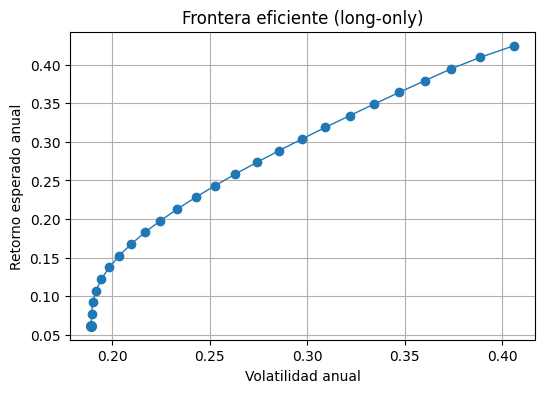

In [13]:
#  Construir la frontera (25 puntos, long-only)
ef = Do_portfolio.efficient_frontier_by_return(mu, Sigma, n_points=25, long_only=True)

curve = ef["curve"]          # target_return, expected_return, volatility, variance
weights_df = ef["weights"]   # pesos por punto (filas=puntos, columnas=tickers)
pmv = ef["pmv"]              # info del PMV

print(curve.head())
print("\nPMV:", pmv)

# Graficar (σ en X, µ en Y)
plt.figure(figsize=(6,4))
plt.plot(curve["volatility"], curve["expected_return"], marker='o', lw=1)
plt.scatter(pmv["volatility"], pmv["expected_return"], s=50)  # marca el PMV
plt.xlabel("Volatilidad anual")
plt.ylabel("Retorno esperado anual")
plt.title("Frontera eficiente (long-only)")
plt.grid(True)
plt.show()


# 3. Curva eficiente

### 3.1 Construcción de la frontera eficiente

In [14]:
# Frontera eficiente por retorno objetivo (long-only)
ef = Do_portfolio.efficient_frontier_by_return(
    mu=mu,
    Sigma=Sigma,
    n_points=30,     # puedes subir a 50-100 si deseas más resolución
    long_only=True,  # w >= 0
    solver=None      # auto (OSQP si está instalado, si no SCS)
)

curve      = ef["curve"]        # DataFrame: ['target_return','expected_return','volatility','variance']
weights_df = ef["weights"]      # DataFrame: una fila por punto, columnas = tickers
pmv        = ef["pmv"]          # dict con: weights (Serie), expected_return, volatility, variance
statuses   = ef["statuses"]     # lista de estados del solver por punto

# Filtrar por soluciones factibles/óptimas (defensivo)
ok_mask = [s in ("optimal", "optimal_inaccurate") for s in statuses]
curve_ok      = curve.loc[ok_mask].reset_index(drop=True)
weights_ok_df = weights_df.loc[ok_mask].reset_index(drop=True)

print(f"Puntos factibles en la curva: {len(curve_ok)} / {len(curve)}")
print("Primeros puntos:\n", curve_ok.head(3))
print("\nPMV (mínima varianza sin objetivo):",
      f"mu={pmv['expected_return']:.4f}, sigma={pmv['volatility']:.4f}")
print("Pesos PMV:\n", pmv["weights"].round(4))



Puntos factibles en la curva: 30 / 30
Primeros puntos:
    target_return  expected_return  volatility  variance
0       0.061984         0.061984    0.189130  0.035770
1       0.074483         0.074483    0.189260  0.035819
2       0.086983         0.086983    0.189651  0.035967

PMV (mínima varianza sin objetivo): mu=0.0620, sigma=0.1891
Pesos PMV:
 AAPL       0.0346
CX         0.0617
TSLA       0.0000
BTC-USD    0.1531
MCD        0.7506
dtype: float64


### 3.2 Gráfico Volatilidad vs Retorno esperado

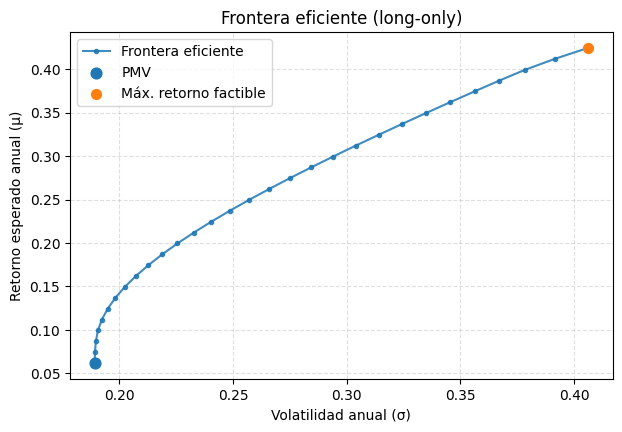

Tabla — Puntos representativos de la frontera (pesos y métricas):


,Punto,μ_target,μ_logrado,σ,w_AAPL,w_CX,w_TSLA,w_BTC-USD,w_MCD
0,BAJO,0.0620,0.0620,0.1891,0.0346,0.0617,0.0,0.1531,0.7506
1,MEDIO,0.2495,0.2495,0.2569,0.0000,0.4916,0.0,0.1594,0.3491
2,ALTO,0.4245,0.4245,0.4061,-0.0000,1.0000,-0.0,0.0000,-0.0000


In [15]:
# Gráfico (σ en X, μ en Y) con PMV 
plt.figure(figsize=(7, 4.5))
plt.plot(curve_ok["volatility"], curve_ok["expected_return"],
         lw=1.5, marker='o', ms=3, alpha=0.85, label="Frontera eficiente")

# Marca PMV
plt.scatter(pmv["volatility"], pmv["expected_return"], s=60, zorder=3, label="PMV")

#  marca el extremo de mayor retorno factible
imax = int(np.argmax(curve_ok["expected_return"].values))
plt.scatter(curve_ok.loc[imax, "volatility"], curve_ok.loc[imax, "expected_return"],
            s=50, zorder=3, label="Máx. retorno factible")

plt.xlabel("Volatilidad anual (σ)")
plt.ylabel("Retorno esperado anual (μ)")
plt.title("Frontera eficiente (long-only)")
plt.grid(True, ls="--", alpha=0.4); plt.legend(); plt.show()

# Tabla resumen de 3 puntos (bajo, medio, alto retorno) con pesos 
idx_low  = 0
idx_mid  = len(curve_ok)//2
idx_high = len(curve_ok)-1

# Aseguramos orden de columnas según tus tickers
tickers_order = list(prices_assets.columns)

resumen = []
for idx, tag in [(idx_low, "BAJO"), (idx_mid, "MEDIO"), (idx_high, "ALTO")]:
    fila = {
        "Punto": tag,
        "μ_target": curve_ok.loc[idx, "target_return"],
        "μ_logrado": curve_ok.loc[idx, "expected_return"],
        "σ": curve_ok.loc[idx, "volatility"],
    }
    # Añadimos pesos por activo
    for t in tickers_order:
        fila[f"w_{t}"] = weights_ok_df.loc[idx, t]
    resumen.append(fila)

tabla_resumen = pd.DataFrame(resumen)
# Formato amigable
cols_fmt = ["Punto", "μ_target", "μ_logrado", "σ"] + [f"w_{t}" for t in tickers_order]
tabla_resumen = tabla_resumen[cols_fmt].copy()
tabla_resumen[["μ_target","μ_logrado","σ"]] = tabla_resumen[["μ_target","μ_logrado","σ"]].round(4)
for t in tickers_order:
    tabla_resumen[f"w_{t}"] = tabla_resumen[f"w_{t}"].round(4)

print("Tabla — Puntos representativos de la frontera (pesos y métricas):")
display(tabla_resumen)


# 4. Portafolios especiales

### 4.1. Determine el portafolio de mínima varianza (PMV).


PMV (con lb) — métricas:
  μ (anual) = 0.0593
  σ (anual) = 0.1898

PMV (con lb) — pesos (ordenados):


,w
MCD,0.7569
BTC-USD,0.1475
CX,0.0595
AAPL,0.0261
TSLA,0.0100


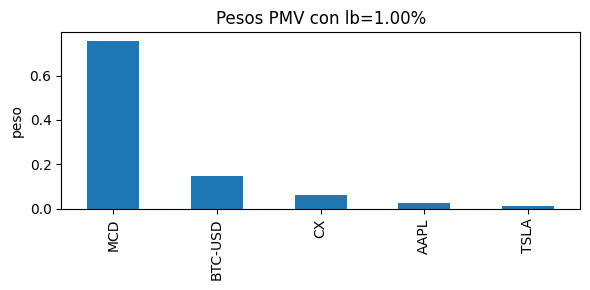

In [ ]:
eps = 0.01   # 1% mínimo por activo; con 5 activos, eps*n = 0.05 <= 1  ⇒ factible

pmv_eps = Do_portfolio.pmv_info_bounded(mu, Sigma, lb=eps, ub=1.0)

print("PMV (con lb) — métricas:")   
print(f"  μ (anual) = {pmv_eps['expected_return']:.4f}")
print(f"  σ (anual) = {pmv_eps['volatility']:.4f}")

print("\nPMV (con lb) — pesos (ordenados):")
w_pmv_eps = pmv_eps["weights"].sort_values(ascending=False).round(4)
display(w_pmv_eps.to_frame("w"))

# Gráfico
w_pmv_eps.plot(kind="bar", figsize=(6,3), title=f"Pesos PMV con lb={eps:.2%}")
plt.ylabel("peso"); plt.tight_layout(); plt.show()



### 4.2. Determine el portafolio tangente (máximo ratio de Sharpe) incorporando el activo libre de riesgo.

In [ ]:
# rf_ann_scalar como antes
try:
    rf_ann_scalar = float(rf_ann.iloc[-1, 0])
except Exception:
    rf_ann_scalar = float(rf_ann.squeeze().iloc[-1])

tan = Do_portfolio.tangency_portfolio(mu, Sigma, rf_ann=rf_ann_scalar, long_only=True)

print("Tangente — estado solver:", tan["status"])
print(f"  μ (anual)   = {tan['expected_return']:.4f}")
print(f"  σ (anual)   = {tan['volatility']:.4f}")
print(f"  Sharpe (rf) = {tan['sharpe']:.4f}\n")

print("Tangente — pesos (ordenados):")
display(tan["weights"].sort_values(ascending=False).round(4).to_frame("w"))

Tangente — estado solver: optimal (SCS)
  μ (anual)   = 0.4074
  σ (anual)   = 0.3866
  Sharpe (rf) = 0.9453

Tangente — pesos (ordenados):


/home/fabian/miniconda3/lib/python3.12/site-packages/scs/__init__.py:83: UserWarning:

Converting A to a CSC (compressed sparse column) matrix; may take a while.



,w
CX,0.9204
BTC-USD,0.0796
AAPL,0.0000
MCD,0.0000
TSLA,0.0000


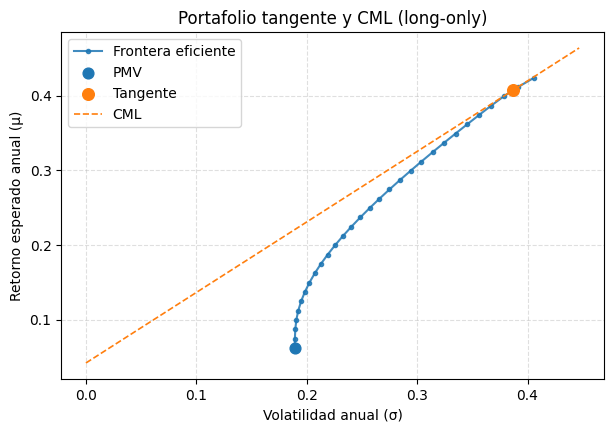

In [22]:
plt.figure(figsize=(7, 4.5))
if 'curve_ok' in globals():
    plt.plot(curve_ok["volatility"], curve_ok["expected_return"], lw=1.5, marker='o', ms=3, alpha=0.85, label="Frontera eficiente")
    plt.scatter(pmv["volatility"], pmv["expected_return"], s=60, zorder=3, label="PMV")

plt.scatter(tan["volatility"], tan["expected_return"], s=70, zorder=4, label="Tangente")
xmax = (curve_ok["volatility"].max() if 'curve_ok' in globals() else tan["volatility"]) * 1.1
xs = np.linspace(0, xmax, 50)
ys = rf_ann_scalar + tan["sharpe"] * xs
plt.plot(xs, ys, lw=1.2, ls="--", label="CML")
plt.xlabel("Volatilidad anual (σ)"); plt.ylabel("Retorno esperado anual (μ)")
plt.title("Portafolio tangente y CML (long-only)"); plt.grid(True, ls="--", alpha=0.4); plt.legend(); plt.show()
